In [71]:
import pandas as pd
import numpy as np

In [72]:
dfClientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

# Analise preliminar

In [73]:
dfClientes.sample(5) # 5 dados aleatórios

# dfClientes.head(5)  os 5 primeiros dados
# dfClientes.tail(5)  os 5 ultimos dados

,id,nome,sexo,dt_nasc
150,151,Luiza Souza,F,3/25/1938
669,670,Tiago Cardoso,M,10/4/1955
428,429,Vitór Rocha,M,10/14/1993
875,876,Camila Barbosa,F,10/14/2001
515,516,Emilly Martins,F,10/15/1955


In [74]:
dfClientes.isnull().sum() # Verificará dentro da tabela quais dados são nulos

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [75]:
dfClientes[dfClientes.isnull().T.any()] # Criando filtro que mostra dentro do dataframe 'clientes' algum nulo

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [76]:
dfClientes.sexo.unique() # Verificando dados unicos do banco de dados 'sexo'

array(['F', 'M', nan], dtype=object)

In [77]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [78]:
dfProdutos.boxplot(column=['valor']) # BoxPlot é um grafico em caixa para analise dos dados

<Axes: >

In [79]:
dfProdutos[dfProdutos.valor > 3000000] # criando filtro em produtos na celula valor que é a cima de 3 milhões

,id,produto,valor
9,10,xxx-231a,3211352.0


In [80]:
dfProdutos[dfProdutos.valor < 3000000].boxplot(column=['valor']) # Criando um boxplot que retira o valor de 3 milhões

<Axes: >

In [81]:
dfVendas[dfVendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [82]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto,dt_venda
count,3000.000000,3000.000000,3000.000000,3000.000000,3000
mean,1500.500000,500.763667,4.538333,4.435000,2019-05-17 17:48:28.799999744
min,1.000000,1.000000,1.000000,1.000000,2018-01-04 00:00:00
25%,750.750000,254.750000,2.000000,3.000000,2018-09-09 00:00:00
50%,1500.500000,503.500000,4.000000,3.000000,2019-05-20 00:00:00
75%,2250.250000,742.000000,7.000000,6.000000,2020-01-29 06:00:00
max,3000.000000,1000.000000,10.000000,10.000000,2020-09-27 00:00:00
std,866.169729,285.322282,2.922221,2.511018,NaN


In [83]:
dfPagamentos.describe()

,id,id_venda,dt_pgto
count,2072.000000,2072.000000,2072
mean,1036.500000,1491.731660,2019-06-06 05:37:45.637065472
min,1.000000,1.000000,2018-01-10 00:00:00
25%,518.750000,746.250000,2018-10-01 12:00:00
50%,1036.500000,1501.500000,2019-06-10 00:00:00
75%,1554.250000,2220.500000,2020-02-08 00:00:00
max,2072.000000,2997.000000,2020-11-03 00:00:00
std,598.279199,864.865583,NaN


# Data Cleaning 

# Dados Nulos (NaN)


In [84]:
dfClientes.loc[dfClientes.nome.isnull(),'nome'] = 'Sem nome'
dfClientes.loc[dfClientes.sexo.isnull(),'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2022'

# Comando loc acessa o registro dando uma linha(Index) e uma coluna(Nome da coluna), com esses comandos acima retiraremos todos os dados NaN.

In [85]:
dfClientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2022
287,288,Victor Ribeiro,O,12/17/1974


In [86]:
dfPagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

# OUTLIERS

In [87]:
dfProdutos.loc[9,'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


In [88]:
dfProdutos.boxplot(column=['valor'])

<Axes: >

# Inconsistencias

In [89]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)] # Validando se os id's de clientes na base 'Vendas' está igual o id de clientes na base 'Clientes'

,id,id_cliente,id_loja,id_produto,dt_venda


In [90]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [91]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [92]:
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [93]:
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)] # Vendas que não geraram pagamentos

,id,id_cliente,id_loja,id_produto,dt_venda
3,4,59,4,3,2018-01-05
5,6,52,8,3,2018-01-05
20,21,270,2,10,2018-01-12
21,22,465,2,3,2018-01-12
32,33,459,2,7,2018-01-13
...,...,...,...,...,...
2992,2993,764,2,7,2020-09-25
2994,2995,6,2,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


# Dados Duplicados 

In [94]:
dfClientes[dfClientes.nome.duplicated()] # Verificando nomes duplicados

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [95]:
dfClientes[dfClientes.nome == 'Anna Melo'] # Validando o nome Anna Melo em específico e verificado que são duas pessoas diferentes por conta da data de nascimento

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [96]:
dfClientes.drop('id', axis=1).duplicated().sum() # retirando a coluna id com o comando drop, informamos o nome da coluna e o eixo, se for = 0 representa linha, se for = 1 representa coluna

0

In [97]:
dfProdutos.produto.duplicated().sum()

0

In [98]:
dfLojas.cidade.duplicated().sum()

0

In [99]:
dfVendas[dfVendas.drop('id', axis= 1).duplicated()] # Validando vendas duplicadas

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [100]:
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_loja == 2) & (dfVendas.id_produto == 5)] # Analisando mais a fundo a venda duplicada acima

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [101]:
dfPagamentos.drop('id', axis=1).duplicated() # Validando dados duplicados em pagamento

0       False
1       False
2       False
3       False
4       False
        ...  
2067    False
2068    False
2069    False
2070    False
2071    False
Length: 2072, dtype: bool

# Formato de Dados

In [102]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y') # Alterando coluna data de nascimento
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


# Indexes

In [103]:
dfClientes = dfClientes.set_index('id') # o meu index agora será da coluna ID
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [104]:
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

In [105]:
dfVendas

,id_cliente,id_loja,id_produto,dt_venda
id,,,,
1,393,9,3,2018-01-04
2,417,9,3,2018-01-04
3,374,7,8,2018-01-04
4,59,4,3,2018-01-05
5,18,9,1,2018-01-05
...,...,...,...,...
2996,671,3,7,2020-09-27
2997,586,8,3,2020-09-27
2998,731,2,4,2020-09-27


# Data Fusion


In [106]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente') #Juntando tabela clientes à tabela vendas
df = df.join(dfLojas.add_prefix('lojas_'), on='id_loja') 
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')


In [107]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [108]:
dfClientes.loc[393] # analisando se a junção de tabelas está coerente

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [109]:
df = df.join(dfPagamentos.set_index('id_venda')) # Fazendo a junção do ID de data de pagamento ao nosso df (Tabela principal)

In [110]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [111]:
df.isnull().sum() # Validando em qual coluna temos dados nulos

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
lojas_cidade         0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# Feature Engineering

In [112]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0 # Inserindo valor 0 nas linhas que o pagamento é nulo
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [113]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days # Criando coluna de tempo de pagamento em dias
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [114]:
# Criando coluna que informa a idade dos nossos clientes
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1, 'Y'))
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,73.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,51.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,81.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,29.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,37.0


# Analise de Vendas e Receita

# Lojas e Produtos que mais vendem

In [115]:
graf_dados = df.groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False) # Numero de vendas por cidade do maior para o menor
graf_dados


lojas_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por Loja')

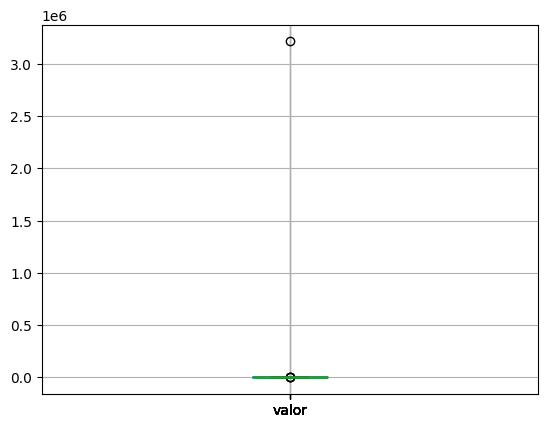

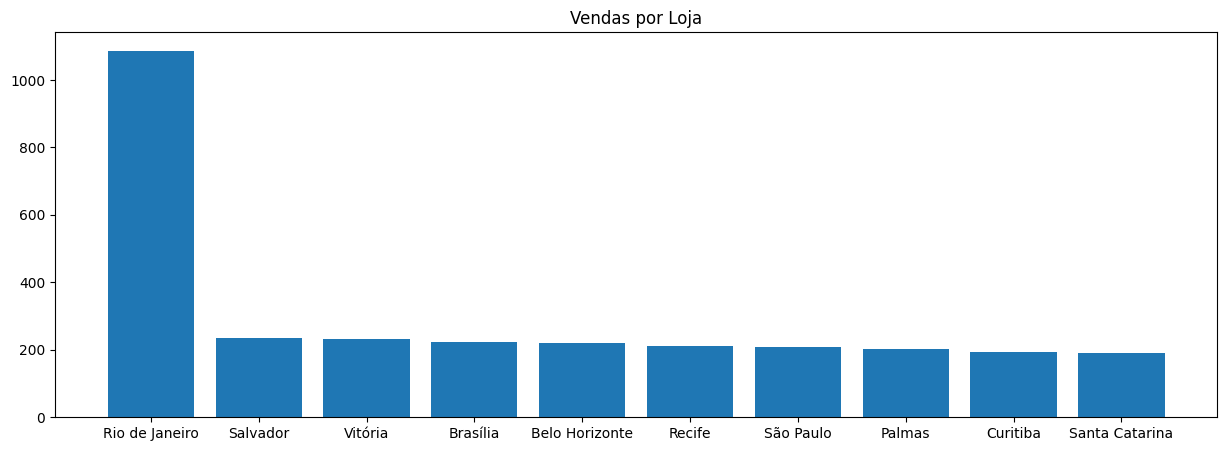

In [116]:
import matplotlib.pyplot as plt # Importando biblioteca para ver grafico
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')


# Produtos que mais vendem

In [117]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False) # Numero de vendas por produto ordenados
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por Produtos')

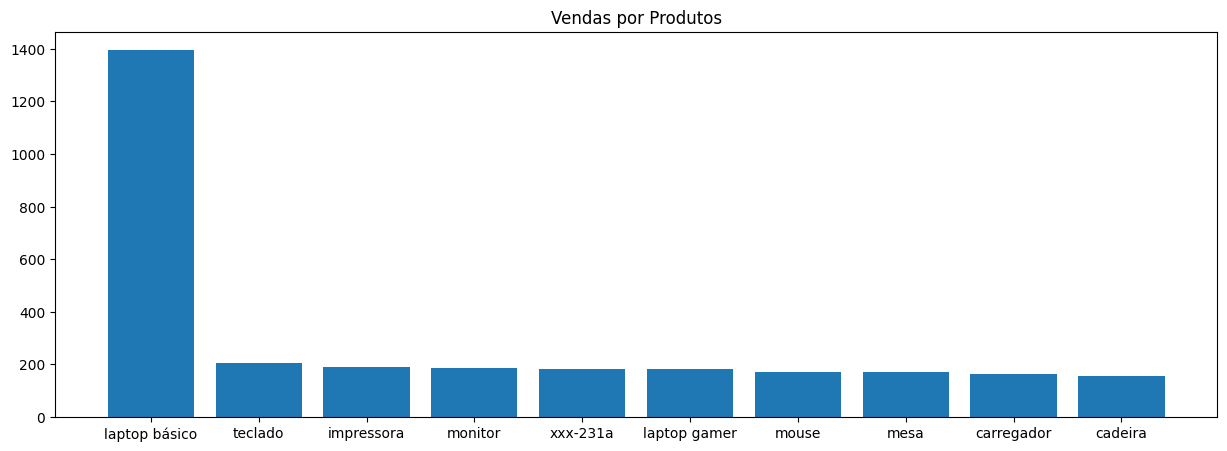

In [118]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Produtos')

# Receita por loja

In [119]:
graf_dados = df[['lojas_cidade','produto_valor']].groupby('lojas_cidade').sum().produto_valor.sort_values(ascending=False)
graf_dados

lojas_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por loja')

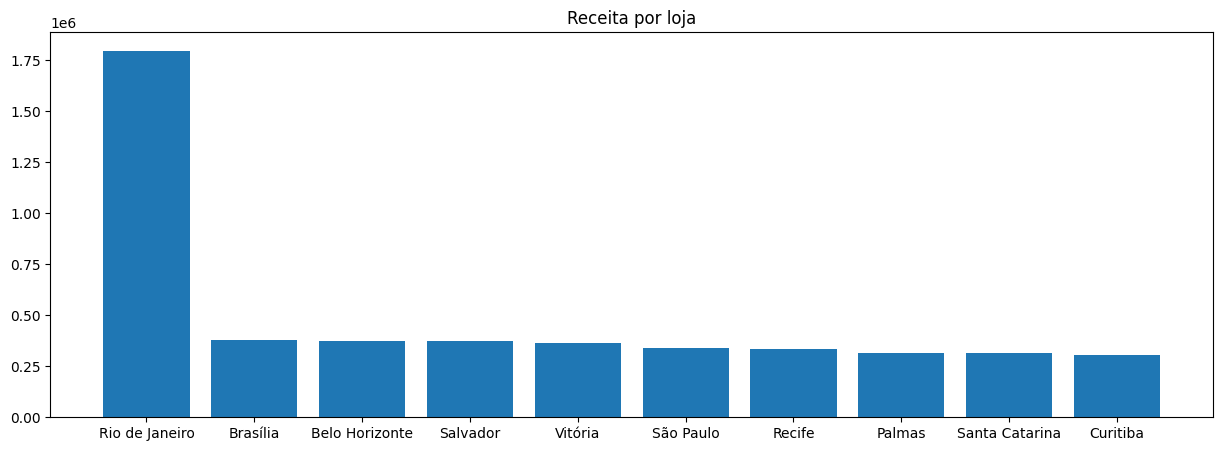

In [120]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por loja')

In [121]:
print('O Maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max()/graf_dados[graf_dados!=graf_dados.max()].mean(), graf_dados[graf_dados!=graf_dados.max()].mean()))
 # Validando quantas vezes o nosso maior valor é maior do que a média

O Maior valor é 1797906, sendo 5.22 vezes a média dos demais, que é 344624


# Receita por produto

In [122]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por produto')

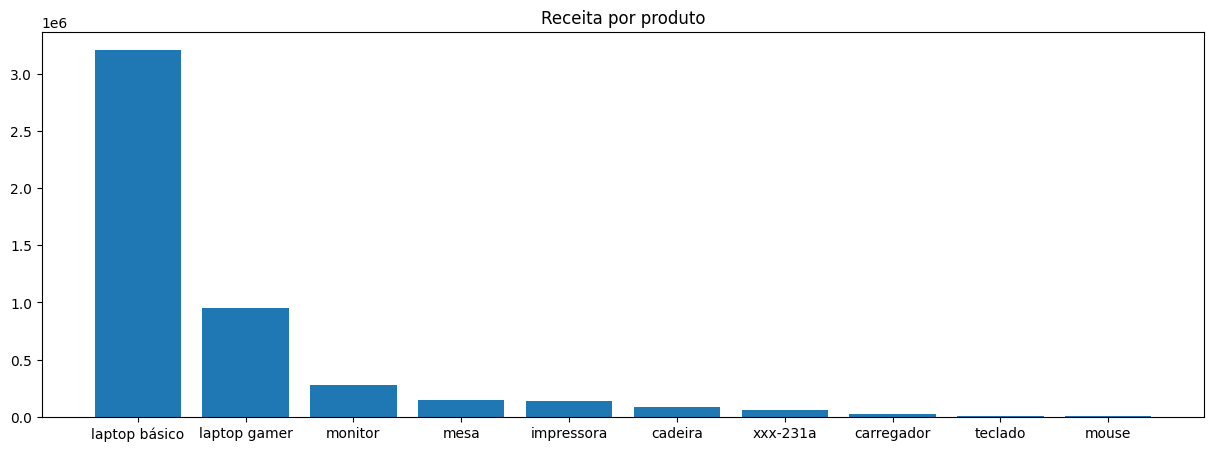

In [123]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')

# Subplots


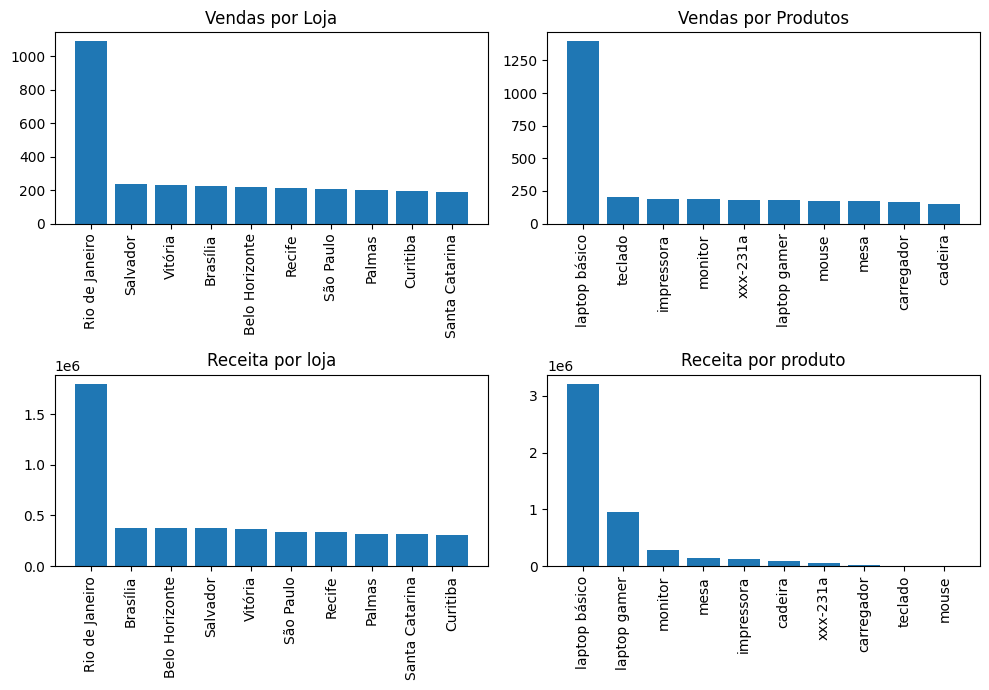

In [124]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
graf_dados = df.groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Loja')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por Produtos')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
graf_dados = df[['lojas_cidade','produto_valor']].groupby('lojas_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por loja')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por produto')
plt.xticks(rotation=90)

plt.tight_layout() # Para não ter sobreposição nas letras

# Vendas por Loja/Vendas por Produtos e a receita dos mesmos em um mesmo grafico




# Receita por Cliente

In [125]:
graf_dados = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
graf_dados

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

Text(0.5, 1.0, 'Receita por cliente')

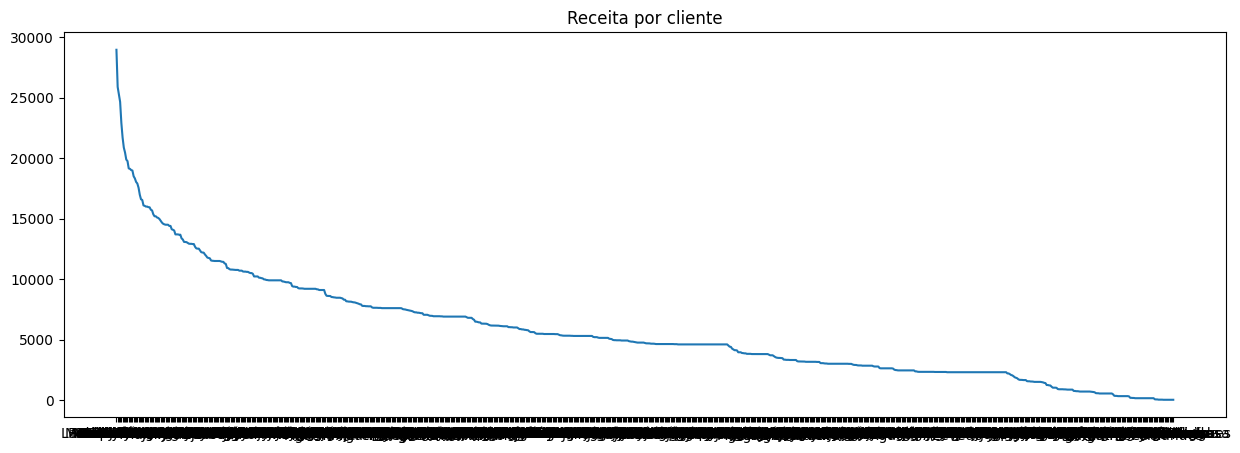

In [126]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title("Receita por cliente")

Text(0.5, 1.0, 'Receita por cliente')

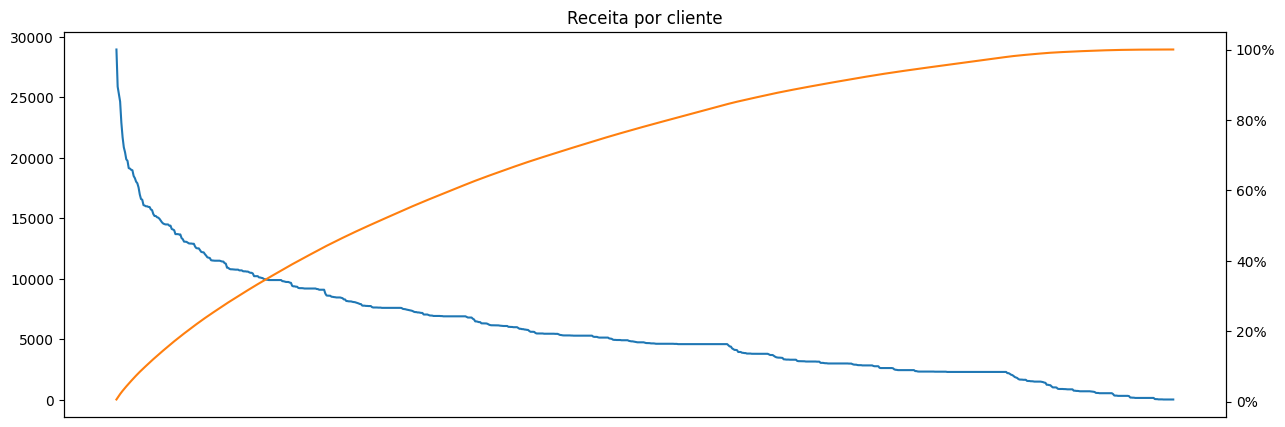

In [127]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados.index, graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/graf_dados.values.sum()*100, color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.title("Receita por cliente")

In [128]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count() # 32% de clientes geram a receita de até 60%

0.3170731707317073

# Pareto

Text(0.5, 1.0, 'Pareto de receita por produto')

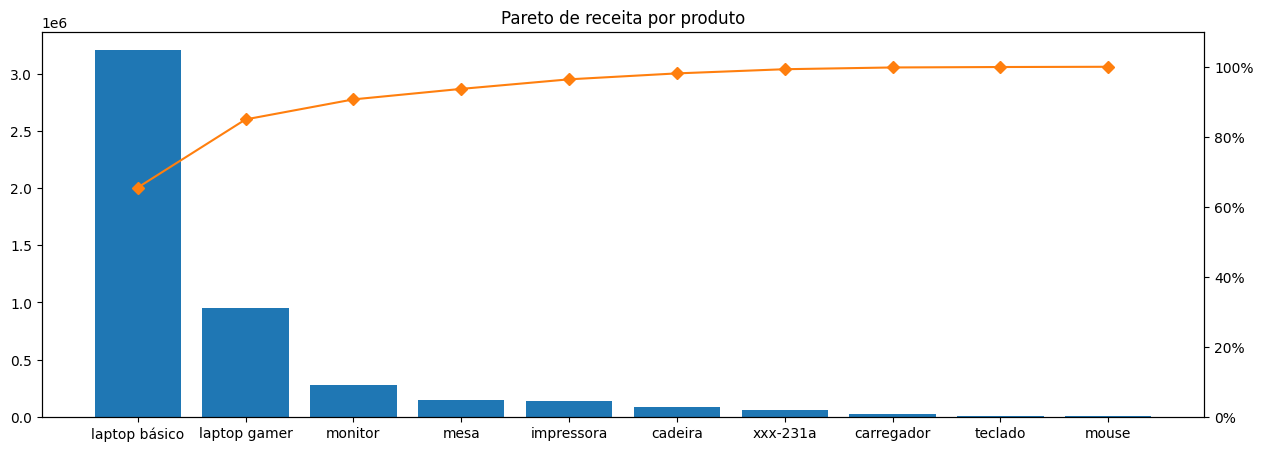

In [129]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum()/ graf_dados.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title("Pareto de receita por produto")

# Receita combinando produto-loja

In [130]:


graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.lojas_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados


,Loja,Produto,Receita
0,Vitória,xxx-231a,7064.9744
1,Vitória,mesa,12040.0000
2,Vitória,cadeira,5400.0000
3,Vitória,carregador,2100.0000
4,Vitória,impressora,8400.0000
...,...,...,...
95,São Paulo,monitor,30000.0000
96,São Paulo,laptop gamer,63600.0000
97,São Paulo,laptop básico,223100.0000
98,São Paulo,teclado,510.0000


<Axes: xlabel='Produto', ylabel='Loja'>

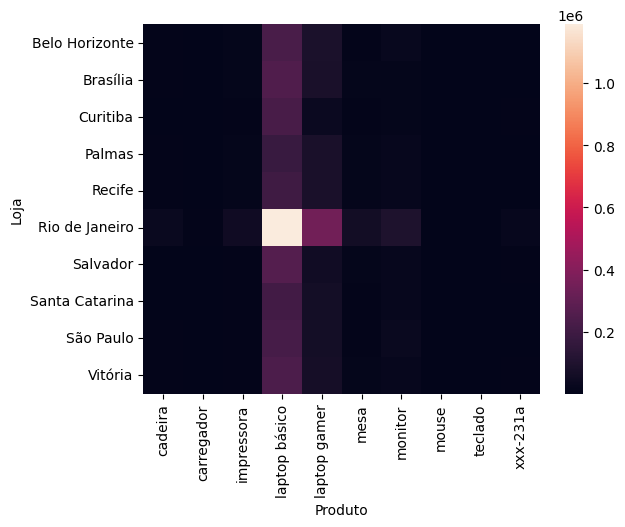

In [131]:
import seaborn as sns # mapa de calor
graf_dados = graf_dados.pivot_table(index='Loja', columns='Produto', values='Receita', aggfunc='sum')
sns.heatmap(graf_dados)

# No mapa de calor as cores escuras são as que contém menos dados e as cores claras as que existem mais dados.


In [132]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.lojas_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados = graf_dados.sort_values(by='Receita', ascending=False)
graf_dados

,Loja,Produto,Receita
87,Rio de Janeiro,laptop básico,1189100.0
86,Rio de Janeiro,laptop gamer,344500.0
37,Salvador,laptop básico,264500.0
27,Brasília,laptop básico,250700.0
7,Vitória,laptop básico,241500.0
...,...,...,...
29,Brasília,mouse,220.0
39,Salvador,mouse,220.0
59,Santa Catarina,mouse,200.0
69,Belo Horizonte,mouse,200.0


In [133]:
graf_dados['lojaprod'] = graf_dados.Loja + '-' + graf_dados.Produto
graf_dados

,Loja,Produto,Receita,lojaprod
87,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
86,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
37,Salvador,laptop básico,264500.0,Salvador-laptop básico
27,Brasília,laptop básico,250700.0,Brasília-laptop básico
7,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
29,Brasília,mouse,220.0,Brasília-mouse
39,Salvador,mouse,220.0,Salvador-mouse
59,Santa Catarina,mouse,200.0,Santa Catarina-mouse
69,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse


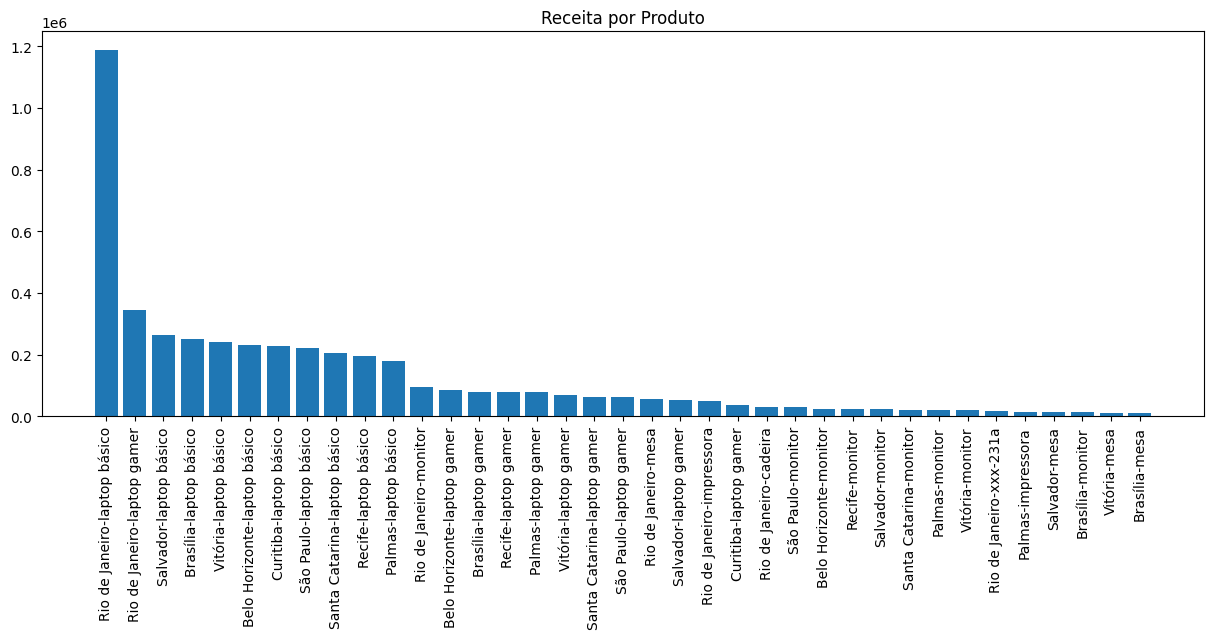

In [134]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.Receita>0.01*graf_dados.Receita.max()], graf_dados.Receita[graf_dados.Receita>0.01*graf_dados.Receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por Produto')
plt.show()

# Analise de Tempo

# Tempo médio de pagamento

In [135]:
df.tempo_pg.mean()

22.47200772200772

Text(0.5, 1.0, 'Boxplot para tempo de pagemento')

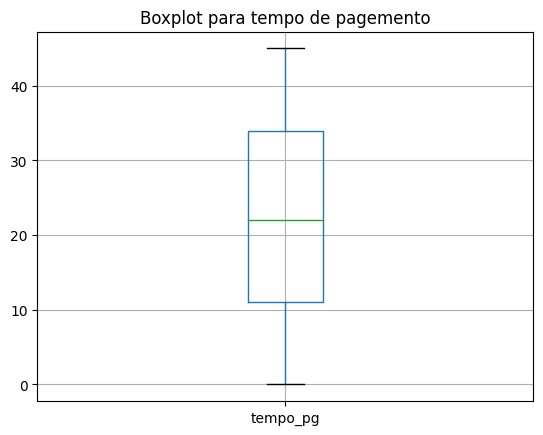

In [137]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagemento')



Text(0.5, 1.0, 'Histograma para tempo de pagamento')

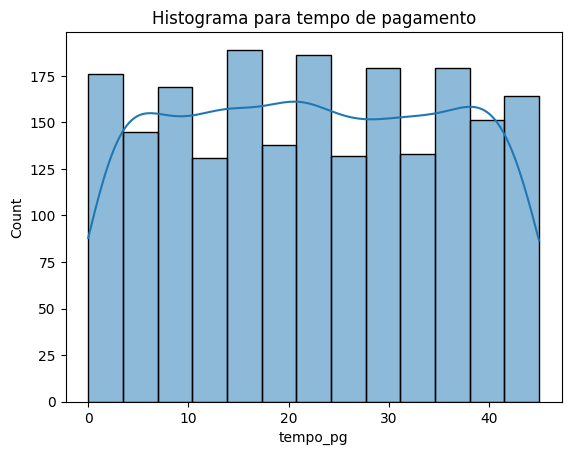

In [139]:
import seaborn as sns

sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Histograma para tempo de pagamento')

In [140]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

# Tempo de pagamento por cidade e produto

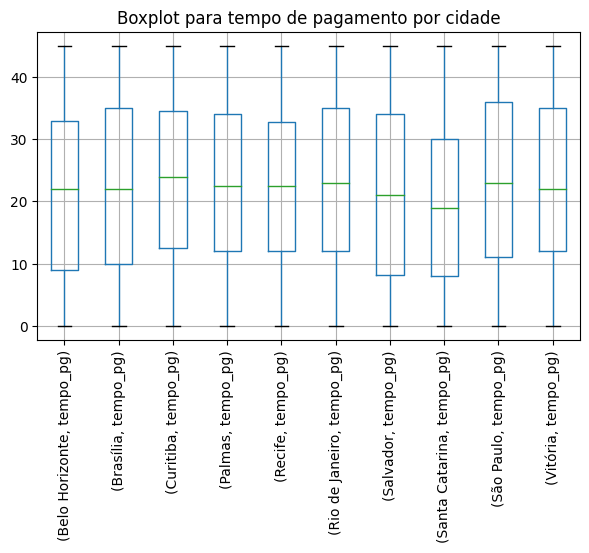

In [149]:
plt.figure(figsize=(7,4))
df[['lojas_cidade', 'tempo_pg']].groupby('lojas_cidade').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [150]:
df.groupby('produto_produto').tempo_pg.mean()

produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: tempo_pg, dtype: float64

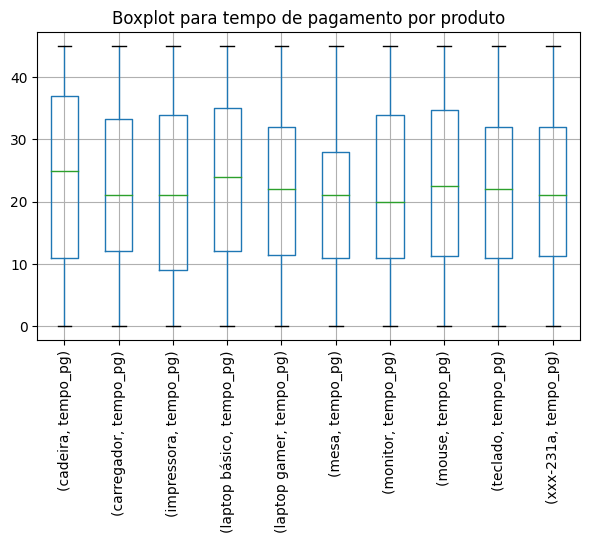

In [151]:
plt.figure(figsize=(7,4))
df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()